(50000, 28, 28) (50000,)


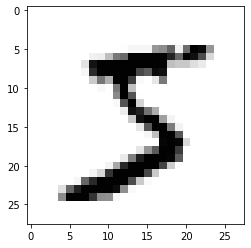

In [43]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Оставим 10000 примеров на валидацию
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Размеры
print(X_train.shape, y_train.shape)
## Нарисуем пример
plt.imshow(X_train[0], cmap="Greys");

In [44]:
## Сделаем объекты плоскими N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

## Лейблы нужно сделать One-Hot
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [45]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [46]:
model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error', 'accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=5, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0866 - mean_squared_error: 0.0866 - accuracy: 0.2040 - val_loss: 0.0823 - val_mean_squared_error: 0.0823 - val_accuracy: 0.2995
Epoch 2/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0775 - mean_squared_error: 0.0775 - accuracy: 0.3234 - val_loss: 0.0714 - val_mean_squared_error: 0.0714 - val_accuracy: 0.3688
Epoch 3/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0665 - mean_squared_error: 0.0665 - accuracy: 0.4556 - val_loss: 0.0602 - val_mean_squared_error: 0.0602 - val_accuracy: 0.5261
Epoch 4/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0545 - mean_squared_error: 0.0545 - accuracy: 0.6094 - val_loss: 0.0462 - val_mean_squared_error: 0.0462 - val_accuracy: 0.6945
Epoch 5/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - accuracy: 0.7287 - val_loss: 0.0350 - val_mean_squared_error: 0.035

In [50]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - accuracy: 0.7871
Test loss: 0.03503701835870743, test mse: 0.03503701835870743, test accuracy: 0.7871000170707703


# Задание
1. Выбрать верный loss
2. Добавить accuracy как оценку качества
3. Исследовать изменение качества при
        3.1. Изменении числа слоев
        3.2. Изменении числа нейронов
        3.3. Изменение функции активации
3. Исследовать параметры SGD, сделать выводы

```
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)
```

# Бинарная кроссэнтропия

In [38]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1294 - mean_squared_error: 0.0355 - accuracy: 0.7761
Epoch 2/5
391/391 [==============================] - 1s 2ms/step - loss: 0.1224 - mean_squared_error: 0.0335 - accuracy: 0.7880
Epoch 3/5
391/391 [==============================] - 1s 2ms/step - loss: 0.1163 - mean_squared_error: 0.0317 - accuracy: 0.7992
Epoch 4/5
391/391 [==============================] - 1s 2ms/step - loss: 0.1111 - mean_squared_error: 0.0301 - accuracy: 0.8082
Epoch 5/5
391/391 [==============================] - 1s 2ms/step - loss: 0.1066 - mean_squared_error: 0.0288 - accuracy: 0.8160


In [53]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0989 - mean_squared_error: 0.0264 - accuracy: 0.8343
Test loss: 0.09885917603969574, test mse: 0.026367774233222008, test accuracy: 0.8342999815940857


# Плюс слой

In [56]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 7s 17ms/step - loss: 0.3087 - mean_squared_error: 0.0867 - accuracy: 0.2556
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2668 - mean_squared_error: 0.0762 - accuracy: 0.6131
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2219 - mean_squared_error: 0.0631 - accuracy: 0.7173
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 0.1803 - mean_squared_error: 0.0501 - accuracy: 0.7758
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1307 - mean_squared_error: 0.0348 - accuracy: 0.8371
Test loss: 0.13069622218608856, test mse: 0.034793954342603683, test accuracy: 0.8371000289916992


# Изменим число нейронов

In [57]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 0.3086 - mean_squared_error: 0.0866 - accuracy: 0.2691
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.2719 - mean_squared_error: 0.0776 - accuracy: 0.4691
Epoch 3/5
391/391 [==============================] - 4s 9ms/step - loss: 0.2362 - mean_squared_error: 0.0673 - accuracy: 0.5764
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 0.2033 - mean_squared_error: 0.0574 - accuracy: 0.6689
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1555 - mean_squared_error: 0.0425 - accuracy: 0.7892
Test loss: 0.15548422932624817, test mse: 0.04246830567717552, test accuracy: 0.7892000079154968


# Везде софтмакс

In [58]:
model = Sequential()
model.add(Dense(512, activation='softmax', input_shape=(28 * 28,)))
model.add(Dense(256, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 7s 18ms/step - loss: 0.3251 - mean_squared_error: 0.0900 - accuracy: 0.0963
Epoch 2/5
391/391 [==============================] - 8s 20ms/step - loss: 0.3251 - mean_squared_error: 0.0900 - accuracy: 0.1136
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 0.3251 - mean_squared_error: 0.0900 - accuracy: 0.1136
Epoch 4/5
391/391 [==============================] - 6s 14ms/step - loss: 0.3250 - mean_squared_error: 0.0900 - accuracy: 0.1136
Epoch 5/5
241/391 [=================>............] - ETA: 2s - loss: 0.3250 - mean_squared_error: 0.0900 - accuracy: 0.1128

KeyboardInterrupt: 

# Везде релу

In [63]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='relu'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 7s 17ms/step - loss: 2.4467 - mean_squared_error: 3.3504 - accuracy: 0.1102
Epoch 2/5
391/391 [==============================] - 7s 17ms/step - loss: 1.7485 - mean_squared_error: 6.4224 - accuracy: 0.3291
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 2.9833 - mean_squared_error: 61.5401 - accuracy: 0.0993
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 3.4770 - mean_squared_error: 64.0745 - accuracy: 0.0989
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 4.9072 - mean_squared_error: 72.6363 - accuracy: 0.1007
Test loss: 4.907151222229004, test mse: 72.63626098632812, test accuracy: 0.1006999984383583


# SGD

In [68]:
from keras.optimizers import SGD
sgd = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 7s 18ms/step - loss: 0.3064 - mean_squared_error: 0.0862 - accuracy: 0.3312
Epoch 2/5
391/391 [==============================] - 7s 18ms/step - loss: 0.2652 - mean_squared_error: 0.0760 - accuracy: 0.6450
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2205 - mean_squared_error: 0.0627 - accuracy: 0.7287
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.1788 - mean_squared_error: 0.0496 - accuracy: 0.7765
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.1302 - mean_squared_error: 0.0348 - accuracy: 0.8369
Test loss: 0.13017894327640533, test mse: 0.03475549444556236, test accuracy: 0.836899995803833


In [69]:
sgd = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3053 - mean_squared_error: 0.0858 - accuracy: 0.3274
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2626 - mean_squared_error: 0.0751 - accuracy: 0.5965
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2172 - mean_squared_error: 0.0616 - accuracy: 0.7049
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.1761 - mean_squared_error: 0.0489 - accuracy: 0.7648
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1288 - mean_squared_error: 0.0344 - accuracy: 0.8284
Test loss: 0.12879112362861633, test mse: 0.03444591537117958, test accuracy: 0.8284000158309937


In [70]:
sgd = SGD(
    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3069 - mean_squared_error: 0.0863 - accuracy: 0.3372
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 0.2613 - mean_squared_error: 0.0749 - accuracy: 0.6809
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 0.2101 - mean_squared_error: 0.0594 - accuracy: 0.7588
Epoch 4/5
391/391 [==============================] - 5s 14ms/step - loss: 0.1648 - mean_squared_error: 0.0451 - accuracy: 0.7968
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1171 - mean_squared_error: 0.0307 - accuracy: 0.8477
Test loss: 0.11709082126617432, test mse: 0.03069118596613407, test accuracy: 0.8476999998092651


In [71]:
sgd = SGD(
    learning_rate=0.01, momentum=0.1, nesterov=True, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 7s 19ms/step - loss: 0.3043 - mean_squared_error: 0.0858 - accuracy: 0.3667
Epoch 2/5
391/391 [==============================] - 7s 19ms/step - loss: 0.2581 - mean_squared_error: 0.0740 - accuracy: 0.6722
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 0.2088 - mean_squared_error: 0.0590 - accuracy: 0.7529
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.1662 - mean_squared_error: 0.0457 - accuracy: 0.7964
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1196 - mean_squared_error: 0.0315 - accuracy: 0.8459
Test loss: 0.1196373999118805, test mse: 0.03149662911891937, test accuracy: 0.8458999991416931


In [72]:
sgd = SGD(
    learning_rate=0.05, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 9s 24ms/step - loss: 0.2252 - mean_squared_error: 0.0633 - accuracy: 0.6485
Epoch 2/5
391/391 [==============================] - 9s 23ms/step - loss: 0.1007 - mean_squared_error: 0.0265 - accuracy: 0.8528
Epoch 3/5
391/391 [==============================] - 11s 29ms/step - loss: 0.0725 - mean_squared_error: 0.0188 - accuracy: 0.8846
Epoch 4/5
391/391 [==============================] - 10s 27ms/step - loss: 0.0621 - mean_squared_error: 0.0161 - accuracy: 0.8975
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0508 - mean_squared_error: 0.0131 - accuracy: 0.9153
Test loss: 0.0507955327630043, test mse: 0.013056233525276184, test accuracy: 0.9153000116348267


In [73]:
sgd = SGD(
    learning_rate=0.1, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 10s 25ms/step - loss: 0.1564 - mean_squared_error: 0.0430 - accuracy: 0.7557
Epoch 2/5
391/391 [==============================] - 7s 18ms/step - loss: 0.0666 - mean_squared_error: 0.0173 - accuracy: 0.8910
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 0.0547 - mean_squared_error: 0.0142 - accuracy: 0.9082
Epoch 4/5
391/391 [==============================] - 8s 20ms/step - loss: 0.0488 - mean_squared_error: 0.0126 - accuracy: 0.9184
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0420 - mean_squared_error: 0.0108 - accuracy: 0.9302
Test loss: 0.04197448864579201, test mse: 0.01080775260925293, test accuracy: 0.9301999807357788


In [74]:
sgd = SGD(
    learning_rate=0.25, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 9s 22ms/step - loss: 0.1068 - mean_squared_error: 0.0289 - accuracy: 0.8257
Epoch 2/5
391/391 [==============================] - 8s 20ms/step - loss: 0.0494 - mean_squared_error: 0.0128 - accuracy: 0.9167
Epoch 3/5
391/391 [==============================] - 7s 17ms/step - loss: 0.0405 - mean_squared_error: 0.0104 - accuracy: 0.9324
Epoch 4/5
391/391 [==============================] - 9s 22ms/step - loss: 0.0345 - mean_squared_error: 0.0088 - accuracy: 0.9426:
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0292 - mean_squared_error: 0.0075 - accuracy: 0.9516
Test loss: 0.029152672737836838, test mse: 0.007503910921514034, test accuracy: 0.9516000151634216


In [75]:
sgd = SGD(
    learning_rate=0.5, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 8s 20ms/step - loss: 0.0777 - mean_squared_error: 0.0208 - accuracy: 0.8715
Epoch 2/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0389 - mean_squared_error: 0.0101 - accuracy: 0.9348
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0292 - mean_squared_error: 0.0075 - accuracy: 0.9516
Epoch 4/5
391/391 [==============================] - 9s 22ms/step - loss: 0.0233 - mean_squared_error: 0.0059 - accuracy: 0.9617
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0218 - mean_squared_error: 0.0058 - accuracy: 0.9624
Test loss: 0.021841492503881454, test mse: 0.005755283869802952, test accuracy: 0.9624000191688538


In [76]:
sgd = SGD(
    learning_rate=1, momentum=0.1, nesterov=False, name="SGD"
)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

Epoch 1/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0631 - mean_squared_error: 0.0170 - accuracy: 0.8876
Epoch 2/5
391/391 [==============================] - 10s 24ms/step - loss: 0.0276 - mean_squared_error: 0.0071 - accuracy: 0.9537
Epoch 3/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0194 - mean_squared_error: 0.0050 - accuracy: 0.9672
Epoch 4/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0146 - mean_squared_error: 0.0037 - accuracy: 0.9759
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0141 - mean_squared_error: 0.0038 - accuracy: 0.9746
Test loss: 0.0141352079808712, test mse: 0.003811461618170142, test accuracy: 0.9746000170707703
